__Eithar Elfatih Burie Abdelrahman DS2403__

# Titanic survived Project

Project Description

The Titanic Problem is based on the sinking of the ‘Unsinkable’ ship Titanic in early 1912. It gives you information about multiple people like their ages, sexes, sibling counts, embarkment points, and whether or not they survived the disaster. 
Based on these features, you have to predict if an arbitrary passenger on Titanic would survive the sinking or not. 


# 1. Import necessary libraries

In [708]:
#Import necessary Libraries
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import warnings 
warnings.filterwarnings('ignore')

import sklearn
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from sklearn.model_selection import train_test_split

# 2.Data Cleaning

In [709]:
#Create dataframe for titianic dataset from csv file 
df2=pd.read_csv("https://raw.githubusercontent.com/FlipRoboTechnologies/ML-Datasets/main/Titanic/titanic_train.csv")
df2.index=df2.index+1 #sort index 
df2

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
1,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
2,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
3,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
4,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
5,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
887,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
888,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
889,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
890,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


In [710]:
#show dataset head 
df2.head(122)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
1,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
2,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
3,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
4,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
5,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
118,118,0,2,"Turpin, Mr. William John Robert",male,29.0,1,0,11668,21.0000,NaN,S
119,119,0,1,"Baxter, Mr. Quigg Edmond",male,24.0,0,1,PC 17558,247.5208,B58 B60,C
120,120,0,3,"Andersson, Miss. Ellis Anna Maria",female,2.0,4,2,347082,31.2750,NaN,S
121,121,0,2,"Hickman, Mr. Stanley George",male,21.0,2,0,S.O.C. 14879,73.5000,NaN,S


In [711]:
#show dataset tail 
df2.tail(10)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
882,882,0,3,"Markun, Mr. Johann",male,33.0,0,0,349257,7.8958,NaN,S
883,883,0,3,"Dahlberg, Miss. Gerda Ulrika",female,22.0,0,0,7552,10.5167,NaN,S
884,884,0,2,"Banfield, Mr. Frederick James",male,28.0,0,0,C.A./SOTON 34068,10.5000,NaN,S
885,885,0,3,"Sutehall, Mr. Henry Jr",male,25.0,0,0,SOTON/OQ 392076,7.0500,NaN,S
886,886,0,3,"Rice, Mrs. William (Margaret Norton)",female,39.0,0,5,382652,29.1250,NaN,Q
887,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
888,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
889,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
890,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C
891,891,0,3,"Dooley, Mr. Patrick",male,32.0,0,0,370376,7.7500,NaN,Q


variables 

In [712]:
# show shape
df2.shape


(891, 12)

In [713]:
#show info

df2.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 1 to 891
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [714]:
#show column values 
df2.columns.values

array(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'], dtype=object)

column breakdown:

    categorical columns:-
    .Survived - no = 0 yes = 1
    .Pclass - 1st, 2nd, 3rd
    .Sex -  male or female 
    .SibSp - passenger had siblings or spouse 
    .Parch - passenger had parents or children 
    .Embarked - place of boarding C S Q
    
    Numerical columns:-
    .Age - how old 
    .Fare - price paid for ticket 
    .PassengerId- number to identify the ticket for each passenger
    


In [715]:
#check for null values 
df2.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [716]:
#check for duplicates
df2.duplicated().value_counts()


False    891
dtype: int64

__COMMENTS:__

**from the above i have concluded the following:**

    .We can see that there is information for 891 passengers, and 12 columns of features that have been measured. 
    .The majority is numerical data and there are three types of data.
    .There are 177 null values for age, 697 for cabin and 2 for embarked.
    .There are no dubplicates
    .There are columns that are not neccessary for our analysis
    
   

__next step:__
__I have decided to drop columns that I see will not be useful in this analysis. These are as follows:__

    . passenger ID - irrelevant to survival
    . Ticket - also has no relation to survival
    . Cabin-as their are so many NaN values
    . Name - 
    
__as for 'Age' and 'Embarked' I will handle the nulls then proceed.__

In [717]:
#drop unnecessary columns
column_to_drop=['PassengerId', 'Ticket', 'Cabin', 'Name']
for col in column_to_drop:
     if col not in df2.columns:
        print(f'Column {col} not found in dataframe.')

df2_copy=df2.drop(columns=column_to_drop)
df2_copy

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
1,0,3,male,22.0,1,0,7.2500,S
2,1,1,female,38.0,1,0,71.2833,C
3,1,3,female,26.0,0,0,7.9250,S
4,1,1,female,35.0,1,0,53.1000,S
5,0,3,male,35.0,0,0,8.0500,S
...,...,...,...,...,...,...,...,...
887,0,2,male,27.0,0,0,13.0000,S
888,1,1,female,19.0,0,0,30.0000,S
889,0,3,female,NaN,1,2,23.4500,S
890,1,1,male,26.0,0,0,30.0000,C


__Handle null data__

In [718]:
df2_copy.isnull().sum()


Survived      0
Pclass        0
Sex           0
Age         177
SibSp         0
Parch         0
Fare          0
Embarked      2
dtype: int64

from the above i will fill in the NaN values as follows:

In [719]:
#check value count of ages
df2_copy['Age'].value_counts().nunique()

25

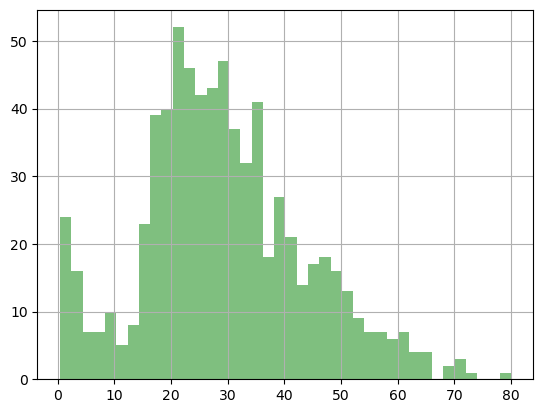

In [720]:
#for age 

df2_copy['Age'].hist(bins=40, color='green', alpha=0.5)
plt.show()

from the histogram, we can see the average age is between 20-30, and the majority of ages lies around this age.

In [721]:
df2_copy.Age.mean()

29.69911764705882

In [722]:
df2_copy.Age.median()

28.0

In [723]:
df2_copy.Age.mode()

0    24.0
Name: Age, dtype: float64

__As all give similar answers i will use the mean to fill in the missing values__

__Now will apply np.ceil to 'Age' and get rid of decimal points as age differnces in decimal formal is irrelevant__

In [727]:
# fill in nan with mean 
df2_copy['Age'].fillna(df2_copy['Age'].mean(), inplace=True)

In [728]:
# apply np.ceil to 'Age; and create int 
df2_copy['Age']=np.ceil(df2_copy['Age']).astype(int)

In [729]:
# value count for 'Age' column
df2_copy['Age'].isnull().sum()

0

In [730]:
#to check NaN values have been filled
df2_copy.sample(10)

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
657,0,3,male,30,0,0,7.8958,S
643,0,3,female,2,3,2,27.9000,S
887,0,2,male,27,0,0,13.0000,S
869,0,3,male,30,0,0,9.5000,S
154,0,3,male,41,0,2,14.5000,S
386,0,2,male,18,0,0,73.5000,S
872,1,1,female,47,1,1,52.5542,S
129,1,3,female,30,1,1,22.3583,C
410,0,3,female,30,3,1,25.4667,S
297,0,3,male,24,0,0,7.2292,C


The embarked column has only 2 missing values.

In [731]:
# value count for 'Embarked' column
df2_copy['Embarked'].value_counts()

S    644
C    168
Q     77
Name: Embarked, dtype: int64

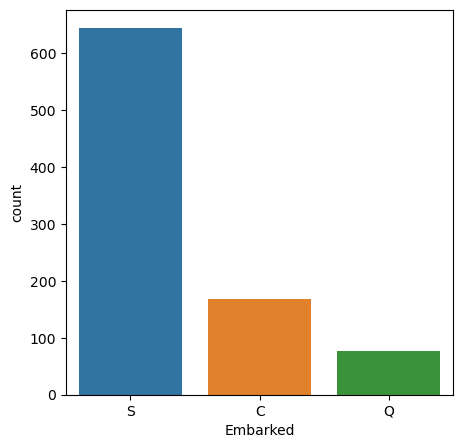

In [732]:
#visualise for embarked

plt.figure(figsize=(5,5))
sns.countplot(x=df2_copy['Embarked'],data=df2_copy,)
plt.show()

__from the above, the overwhelming majority is S as it is the most common by far. Therefore I will replace with 'S'__

In [733]:
# fill in nan with 'S'
df2_copy['Embarked']=(df2_copy['Embarked'].fillna('S'))



In [734]:
# value count for 'Embarked' column
df2_copy['Embarked'].value_counts()

S    646
C    168
Q     77
Name: Embarked, dtype: int64

__'S' value count has changed from 644 to 646
now we can continue__


now we have dropped columns and handled nulls. 

# 3.Feature Engineering


to make all columns numerical :

In [735]:
#clean data and convert to numerical (sex and Embarked)

#sex - female=0, male=1
sex_map= {'male':0, 'female':1}

#embarked - 'S'=0, 'C'=1, 'Q'=2
embarked_map={'S':0, 'C': 1, 'Q':2}

df2_copy['Sex']=df2_copy['Sex'].map(sex_map)
df2_copy['Embarked']=df2_copy['Embarked'].map(embarked_map)

In [736]:
#make sure all values are int or float
df2_copy

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
1,0,3,0,22,1,0,7.2500,0
2,1,1,1,38,1,0,71.2833,1
3,1,3,1,26,0,0,7.9250,0
4,1,1,1,35,1,0,53.1000,0
5,0,3,0,35,0,0,8.0500,0
...,...,...,...,...,...,...,...,...
887,0,2,0,27,0,0,13.0000,0
888,1,1,1,19,0,0,30.0000,0
889,0,3,1,30,1,2,23.4500,0
890,1,1,0,26,0,0,30.0000,1


In [737]:
#make sure 'Sex', 'Embarked' are values
df2_copy.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 1 to 891
Data columns (total 8 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Survived  891 non-null    int64  
 1   Pclass    891 non-null    int64  
 2   Sex       891 non-null    int64  
 3   Age       891 non-null    int32  
 4   SibSp     891 non-null    int64  
 5   Parch     891 non-null    int64  
 6   Fare      891 non-null    float64
 7   Embarked  891 non-null    int64  
dtypes: float64(1), int32(1), int64(6)
memory usage: 52.3 KB


__Now all columns are int 64, int 32, and float 64__

# 4. Data Pre-processing

__Univariate Analysis__

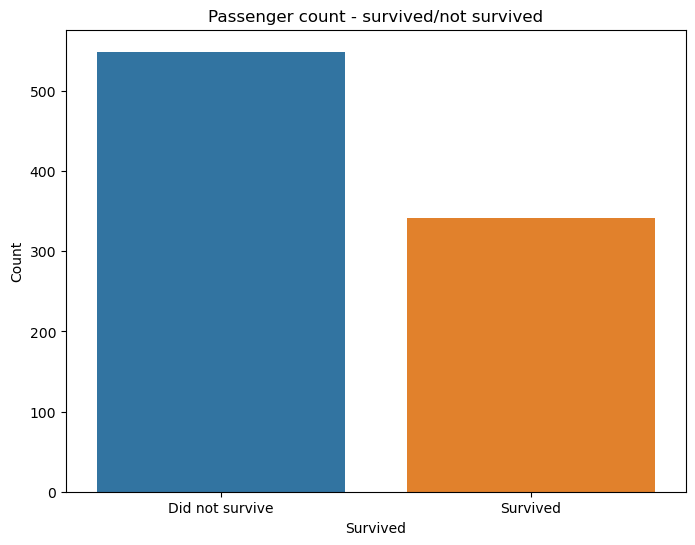

In [738]:
#Create a count plot of Survived
#survived
plt.figure(figsize=(8,6))
sns.countplot(x='Survived',data=df2_copy)
plt.xlabel('Survived')
plt.ylabel('Count')
plt.title('Passenger count - survived/not survived')
plt.xticks([0,1], ['Did not survive', 'Survived'])
plt.show()

In [739]:
# show counts
survived_count=df2_copy['Survived'].value_counts()
print(survived_count)

0    549
1    342
Name: Survived, dtype: int64


__comment:__ More than half of passengers did not survive

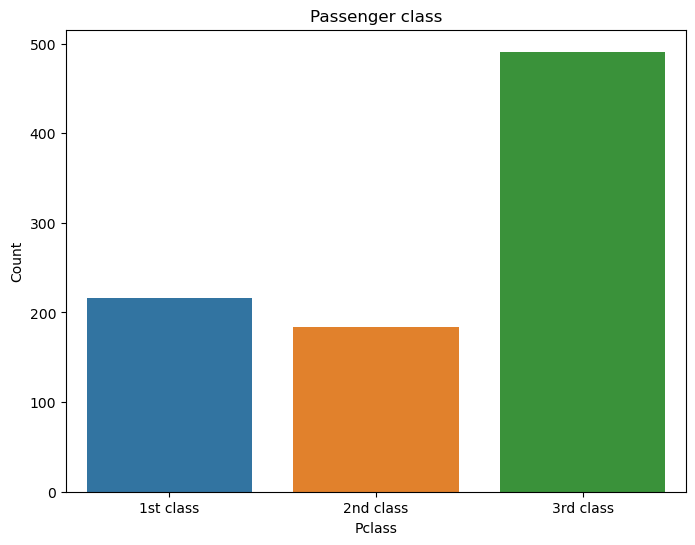

In [740]:
#Pclass
plt.figure(figsize=(8,6))
sns.countplot(x='Pclass',data=df2_copy)
plt.xlabel('Pclass')
plt.ylabel('Count')
plt.title('Passenger class')
plt.xticks([0,1,2], ['1st class', '2nd class', '3rd class'])
plt.show()

In [741]:
# show counts
class_count=df2_copy['Pclass'].value_counts()
print(class_count)

3    491
1    216
2    184
Name: Pclass, dtype: int64


__comment:__ majority of passengers were in 3rd class. 

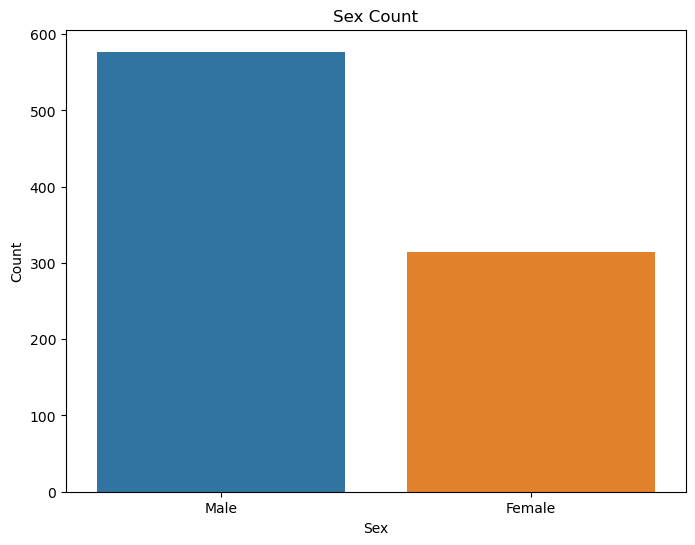

In [742]:
#Pclass
plt.figure(figsize=(8,6))
sns.countplot(x='Sex',data=df2_copy)
plt.xlabel('Sex')
plt.ylabel('Count')
plt.title('Sex Count')
plt.xticks([0,1], ['Male', 'Female'])
plt.show()

In [743]:
# show value counts (percentage)
sex_count=df2_copy['Sex'].value_counts()/891*100
print(sex_count)

0    64.758698
1    35.241302
Name: Sex, dtype: float64


__COMMENT:__ around 65% of the passengers were male. therefore we should expect a higher death rate amongst male passengers

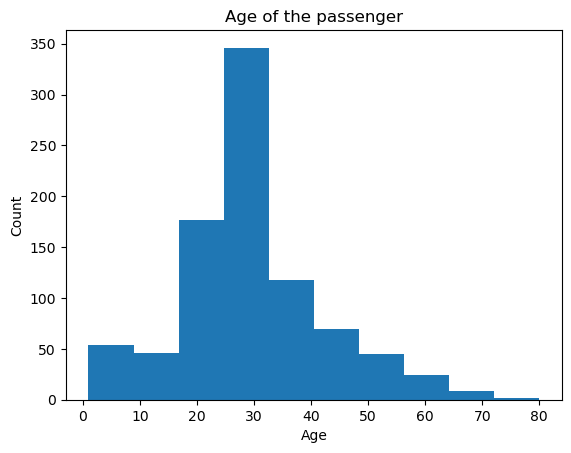

In [744]:
#Age

plt.hist(x='Age',data=df2_copy)
plt.xlabel('Age')
plt.ylabel('Count')
plt.title('Age of the passenger')

plt.show()

__COMMENT:__ majority of passengers ages were 25-30

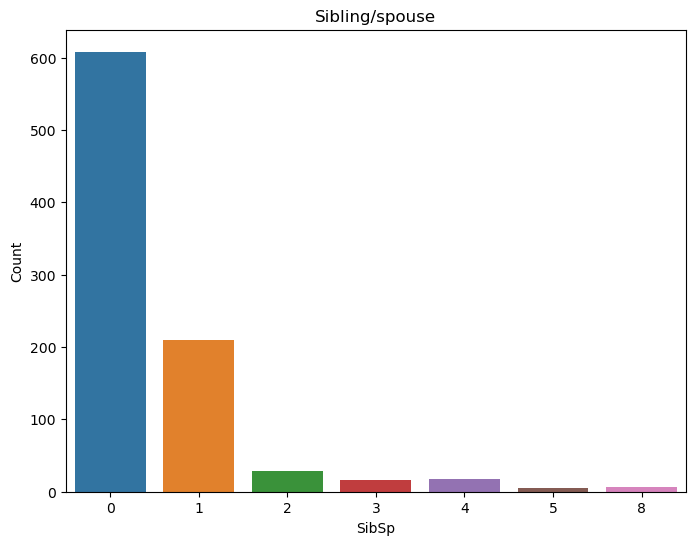

In [745]:
#SibSp
plt.figure(figsize=(8,6))
sns.countplot(x='SibSp',data=df2_copy)
plt.xlabel('SibSp')
plt.ylabel('Count')
plt.title('Sibling/spouse')
plt.xticks([0,1,2,3,4,5,6], ['0','1','2','3','4','5','8'])
plt.show()

In [746]:
# show counts
sib_count=df2_copy['SibSp'].value_counts()
print(sib_count)

0    608
1    209
2     28
4     18
3     16
8      7
5      5
Name: SibSp, dtype: int64


__COMMENT:__ around 70% of the passengers didnt have any siblings or spouse 

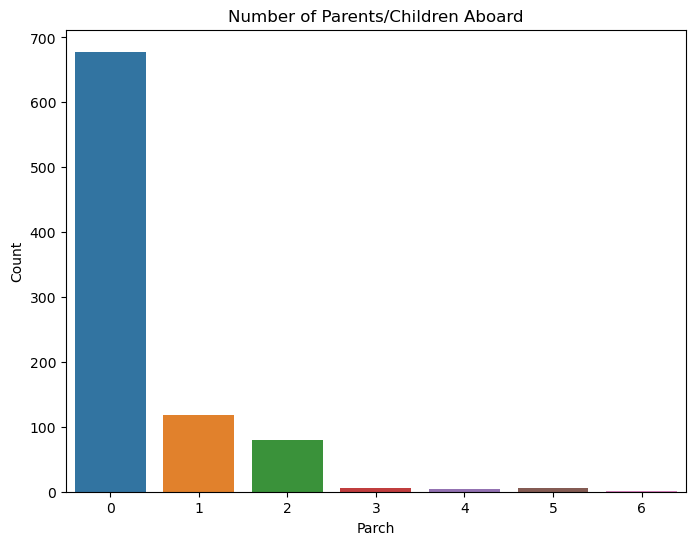

In [747]:
#Parch
plt.figure(figsize=(8,6))
sns.countplot(x='Parch',data=df2_copy)
plt.xlabel('Parch')
plt.ylabel('Count')
plt.title('Number of Parents/Children Aboard')
plt.xticks([0,1,2,3,4,5,6], ['0','1','2','3','4','5','6'])
plt.show()

In [748]:
# show counts
par_count=df2_copy['Parch'].value_counts()

print(par_count)

0    678
1    118
2     80
5      5
3      5
4      4
6      1
Name: Parch, dtype: int64


__COMMENT:__ 678 (76%) passengers had no parents/children. This seems accurate as it was expensive so majority of people are in 3rd class.

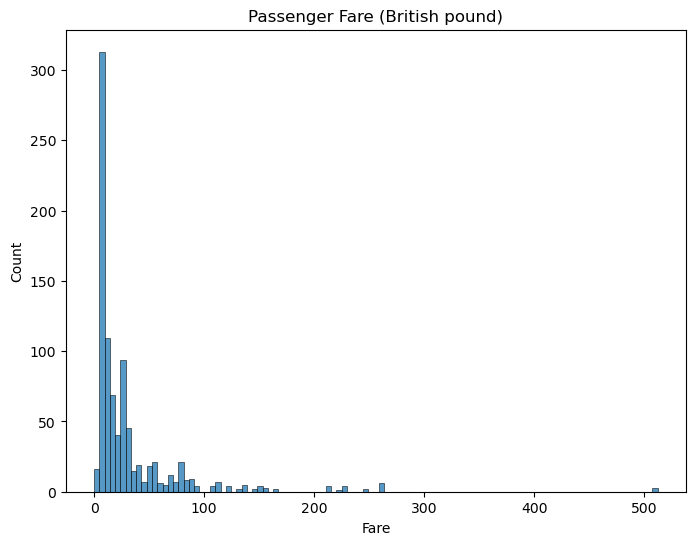

In [749]:
#Fare
plt.figure(figsize=(8,6))
sns.histplot(x='Fare',data=df2_copy)
plt.xlabel('Fare')
plt.ylabel('Count')
plt.title('Passenger Fare (British pound)')

plt.show()

In [750]:
# show counts
fare_count=df2_copy['Fare'].value_counts()

print(fare_count)

8.0500     43
13.0000    42
7.8958     38
7.7500     34
26.0000    31
           ..
35.0000     1
28.5000     1
6.2375      1
14.0000     1
10.5167     1
Name: Fare, Length: 248, dtype: int64


__COMMENT:__  The overwhelming majority of passengers paid £8-£13 for their ticket.
        .highly skewed to the left 
        .there are outliers 

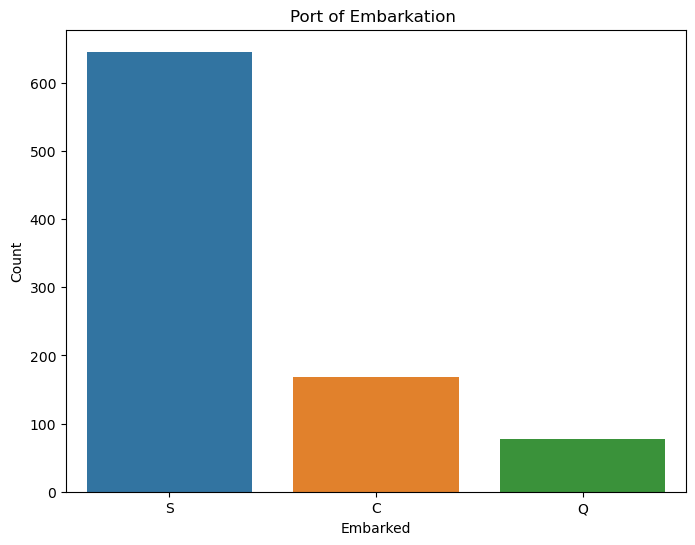

In [751]:
#Embarked
plt.figure(figsize=(8,6))
sns.countplot(x='Embarked',data=df2_copy)
plt.xlabel('Embarked')
plt.ylabel('Count')
plt.title('Port of Embarkation ')
plt.xticks([0,1,2,], ['S','C','Q'])
plt.show()

In [752]:
# show counts
emb_count=df2_copy['Embarked'].value_counts()

print(emb_count)

0    646
1    168
2     77
Name: Embarked, dtype: int64


__COMMENT:__ 72% embarked from Southampton, 

# Multivariate Analysis

as stated in our porbelem statement... our depend variable is 'Survived' so I will be exploring the survival to the rest of the variables. 

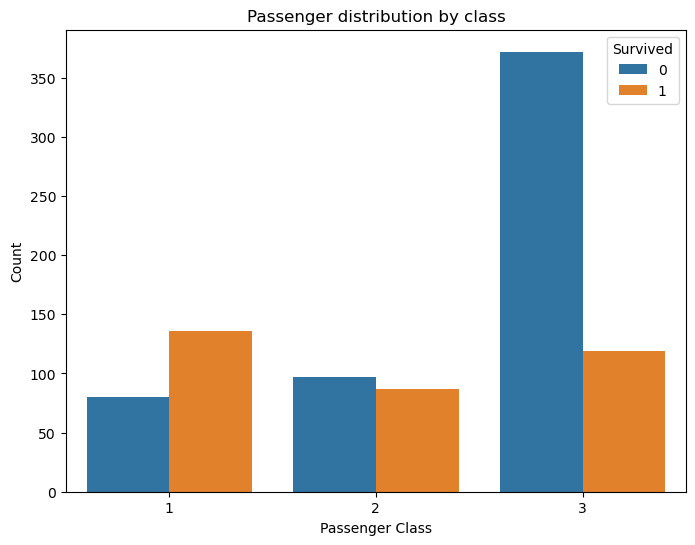

Survived,0,1
Pclass,,
1,80,136
2,97,87
3,372,119


In [753]:
#create plot of Pclass to Survived
plt.figure(figsize=(8,6))
sns.countplot(x='Pclass', hue='Survived',data=df2_copy)
plt.xlabel('Passenger Class')
plt.ylabel('Count')
plt.title('Passenger distribution by class')

plt.show()

pd.crosstab(df2_copy['Pclass'],df2_copy['Survived'])

__observations:__

    . In first class- there were more females than males
    . In second class - it was almost equal 
    . In third class- the majority was male
    . Females were almost equally distributed between the 3 classes


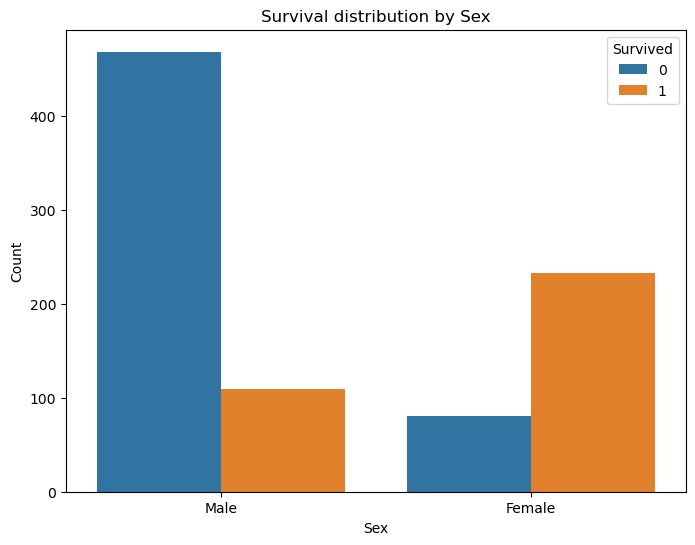

Survived,0,1
Sex,,
0,468,109
1,81,233


In [754]:
#create 
plt.figure(figsize=(8,6))
sns.countplot(x='Sex', hue='Survived',data=df2_copy)
plt.xlabel('Sex')
plt.ylabel('Count')
plt.xticks([0,1], ['Male','Female'])
plt.title('Survival distribution by Sex')

plt.show()

pd.crosstab(df2_copy['Sex'],df2_copy['Survived'])

__Observations:__

    . many more male did not survive in comparison to female
    . women and children more likely to be saved therfore higher survial rate 
    

<Axes: xlabel='Age', ylabel='Density'>

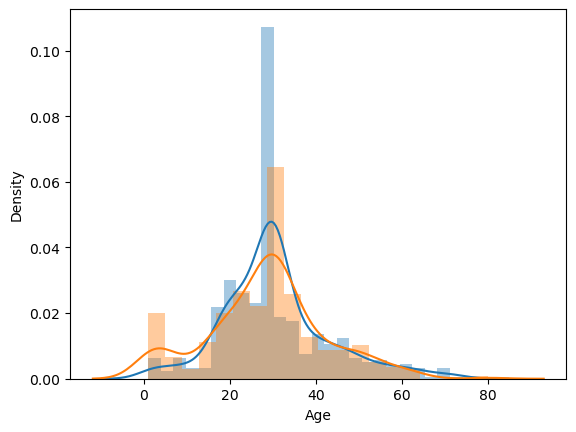

In [755]:
#ages of passengers who didnt survive  ble not survived orange survived
sns.distplot(df2_copy[df2_copy['Survived']==0]['Age'])
sns.distplot(df2_copy[df2_copy['Survived']==1]['Age'])

__OBSERVATIONS:__ very similar survival rate in terms of age 
    
    higher importance to save chidren and elderly people
    higher survival rate for lower and higher age group

<Axes: xlabel='Fare', ylabel='Density'>

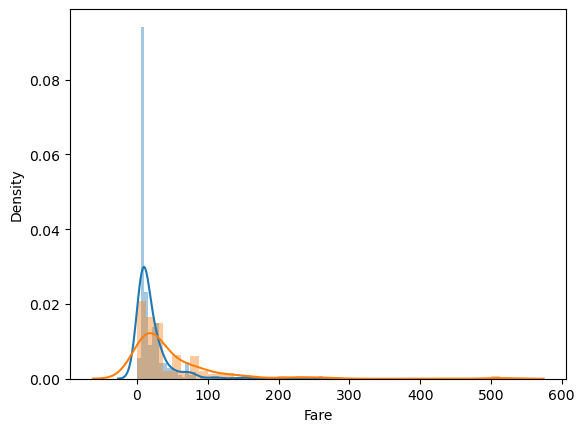

In [756]:
# passenger fare (blue not survived, orange survived)
sns.distplot(df2_copy[df2_copy['Survived']==0]['Fare'])
sns.distplot(df2_copy[df2_copy['Survived']==1]['Fare'])



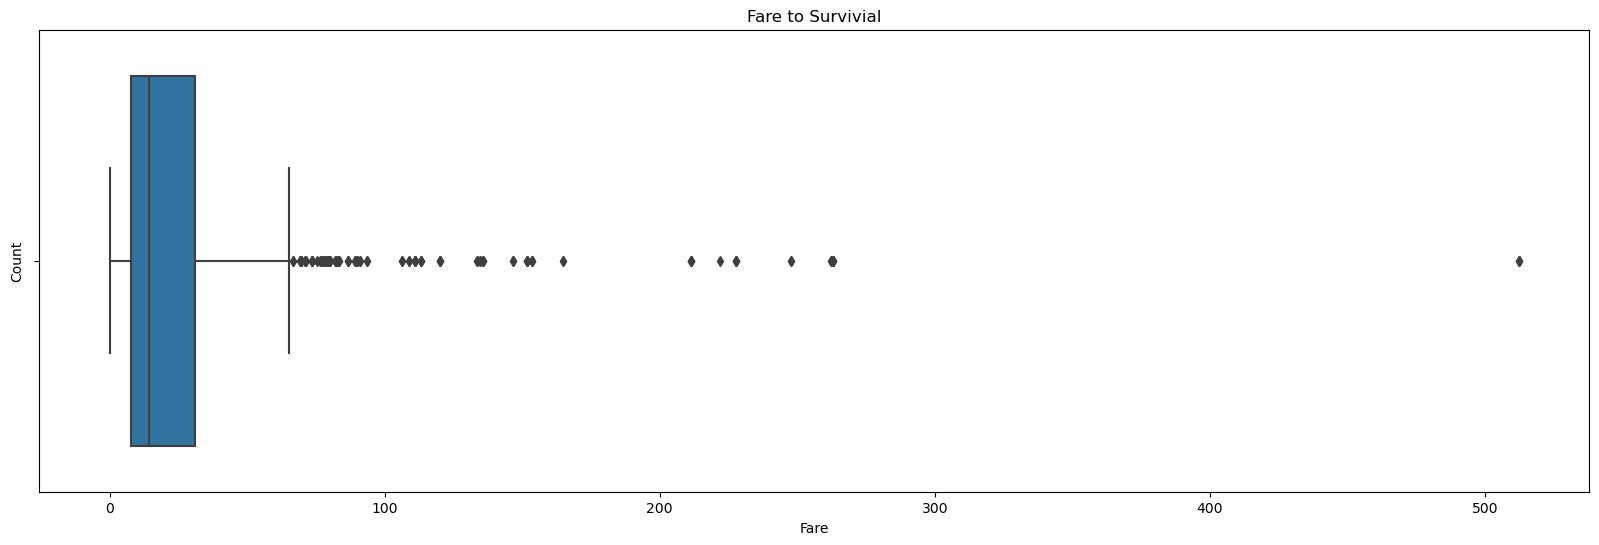

Survived,0,1
Fare,,
0.0000,14,1
4.0125,1,0
5.0000,1,0
6.2375,1,0
6.4375,1,0
...,...,...
227.5250,1,3
247.5208,1,1
262.3750,0,2


In [757]:
#create survival / fare 
plt.figure(figsize=(20,6))
sns.boxplot(x='Fare', hue='Survived',data=df2_copy)
plt.xlabel('Fare')
plt.ylabel('Count')
plt.title('Fare to Survivial')

plt.show()

pd.crosstab(df2_copy['Fare'],df2_copy['Survived'])

__OBSERVATIONS:__
    
    . Majority of passangers who paid lower fares did not survive
    . Many outliers 

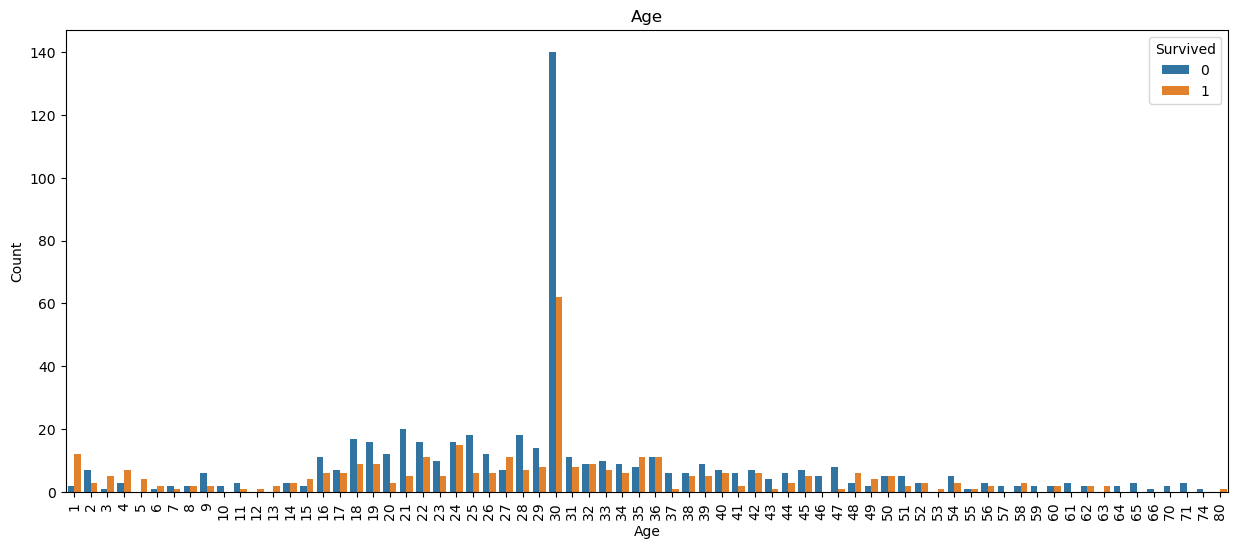

Survived,0,1
Age,,
1,2,12
2,7,3
3,1,5
4,3,7
5,0,4
...,...,...
66,1,0
70,2,0
71,3,0


In [758]:
#create survival / age


plt.figure(figsize=(15,6))
sns.countplot(x='Age', hue='Survived',data=df2_copy)
plt.xlabel('Age')
plt.ylabel('Count')
plt.title('Age')

plt.xticks(rotation=90)
plt.show()

pd.crosstab(df2_copy['Age'],df2_copy['Survived'])

__OBSERVATIONS:__
    
    . young child to age 5 survived more than did not 
    . age 30 highest deate rate 
    .age count is high 

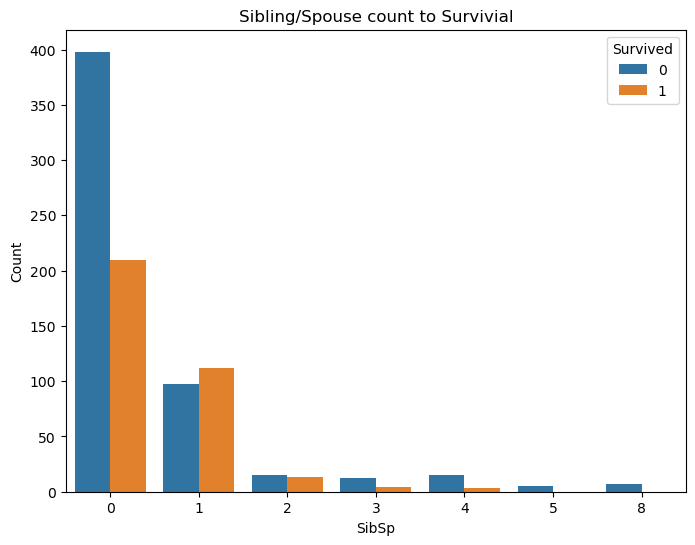

Survived,0,1
SibSp,,
0,398,210
1,97,112
2,15,13
3,12,4
4,15,3
5,5,0
8,7,0


In [759]:
#create survival / Sibsp
plt.figure(figsize=(8,6))
sns.countplot(x='SibSp', hue='Survived',data=df2_copy)
plt.xlabel('SibSp')
plt.ylabel('Count')
plt.title('Sibling/Spouse count to Survivial')

plt.show()

pd.crosstab(df2_copy['SibSp'],df2_copy['Survived'])

__OBSERVATION:__

    . Majority of passangers who did not have siblings or spouse, did not survive 
    . 

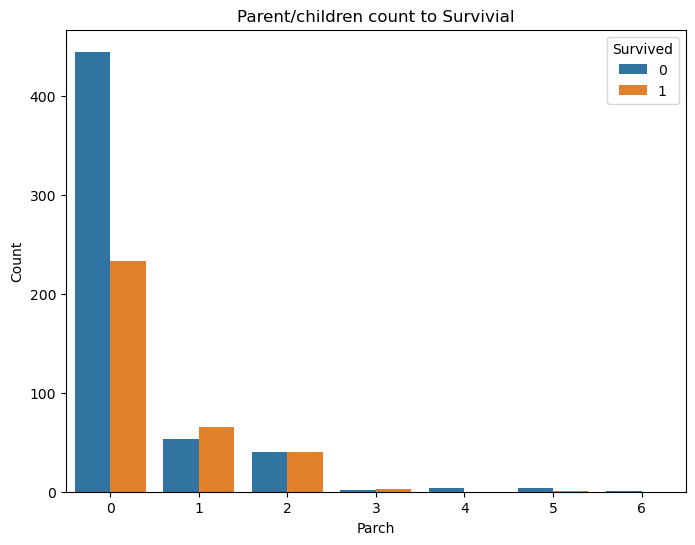

Survived,0,1
Parch,,
0,445,233
1,53,65
2,40,40
3,2,3
4,4,0
5,4,1
6,1,0


In [760]:
#create survival / Parch 
plt.figure(figsize=(8,6))
sns.countplot(x='Parch', hue='Survived',data=df2_copy)
plt.xlabel('Parch')
plt.ylabel('Count')
plt.title('Parent/children count to Survivial')

plt.show()

pd.crosstab(df2_copy['Parch'],df2_copy['Survived'])

__OBSERVATION:__ 
    
    .Majority of passengers didnt have parents or children 
    .Passengers with parents or children, majority had 1 or 2.(and survival rate was higher

In [761]:
df2_copy['Fare'].value_counts()

8.0500     43
13.0000    42
7.8958     38
7.7500     34
26.0000    31
           ..
35.0000     1
28.5000     1
6.2375      1
14.0000     1
10.5167     1
Name: Fare, Length: 248, dtype: int64

__COMMENT:__ 

    . Fares of passengers varied in price signigficantly (248 unique values)

<Axes: >

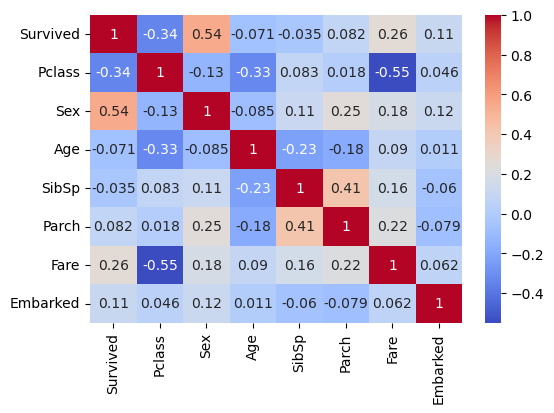

In [762]:
#correlation matrix
corr_= df2_copy.corr()
plt.figure(figsize=(6,4))
sns.heatmap(corr_,annot=True, cmap='coolwarm')


__OBSERVATIONS:__ 

The heatmap displays that only a few of the features seem to have some correlation with one another. This indicates that most columns have unique information.

        .Sex/survived highest correlation (0.54)
        .Parch and Sibsp second highest correlation (0.41) 
        .fare and survived (0.26)
        . pclass most negatively correlated to survived (-0.34)
        
        
        

SibSp and Parch are highly correlated and similar in feature, therefore  i will add them together to create one column 'FamMemebers'.

In [763]:
df2_copy['FamMembers']=df2_copy['Parch']+df2_copy ['SibSp']+1

In [764]:
#check change
df2_copy.head(5)

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,FamMembers
1,0,3,0,22,1,0,7.2500,0,2
2,1,1,1,38,1,0,71.2833,1,2
3,1,3,1,26,0,0,7.9250,0,1
4,1,1,1,35,1,0,53.1000,0,2
5,0,3,0,35,0,0,8.0500,0,1


In [765]:
df2_copy['FamMembers'].isnull().sum()

0

In [766]:
#to make this more relatable, I will change them to 1,2,3. 

def fam_type (number):
    if number==0:
        return 'Single'
    elif number >0 and number <=4:
        return 'Small'
    else:
        return 'Large'




In [767]:
df2_copy['Famsize']=df2_copy['FamMembers'].apply(fam_type)

In [768]:
#check table 
df2_copy.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,FamMembers,Famsize
1,0,3,0,22,1,0,7.2500,0,2,Small
2,1,1,1,38,1,0,71.2833,1,2,Small
3,1,3,1,26,0,0,7.9250,0,1,Small
4,1,1,1,35,1,0,53.1000,0,2,Small
5,0,3,0,35,0,0,8.0500,0,1,Small


In [769]:
#make Famsize numberical

Fam_size= {'Single':0, 'Small':1, 'Large':2}
df2_copy['Famsize']=df2_copy['Famsize'].map(Fam_size)



In [770]:
df2_copy.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,FamMembers,Famsize
1,0,3,0,22,1,0,7.2500,0,2,1
2,1,1,1,38,1,0,71.2833,1,2,1
3,1,3,1,26,0,0,7.9250,0,1,1
4,1,1,1,35,1,0,53.1000,0,2,1
5,0,3,0,35,0,0,8.0500,0,1,1


In [771]:
df2_copy['Famsize'].isnull().sum()

0

In [772]:
df2_copy['Age'].value_counts()

30    202
24     31
22     27
18     26
28     25
     ... 
12      1
53      1
80      1
66      1
74      1
Name: Age, Length: 70, dtype: int64

In [773]:
#drop 'FamMembers', 'SibSp' and 'Parch' 

df2_copy.drop(columns=['SibSp', 'Parch', 'FamMembers'], inplace=True)

In [774]:
df2_copy

,Survived,Pclass,Sex,Age,Fare,Embarked,Famsize
1,0,3,0,22,7.2500,0,1
2,1,1,1,38,71.2833,1,1
3,1,3,1,26,7.9250,0,1
4,1,1,1,35,53.1000,0,1
5,0,3,0,35,8.0500,0,1
...,...,...,...,...,...,...,...
887,0,2,0,27,13.0000,0,1
888,1,1,1,19,30.0000,0,1
889,0,3,1,30,23.4500,0,1
890,1,1,0,26,30.0000,1,1


In [775]:
pd.crosstab(df2_copy['Famsize'],df2_copy['Survived'],normalize='index') *100

Survived,0,1
Famsize,,
1,59.951749,40.048251
2,83.870968,16.129032


__OBSERVATION__:

    from this table, we can see a very clear occurrence. 
        .70%(69.7%) of passengers who were alone did not survive this. this is very high in comparison to small families which was more balanced at 44% survival and 85% for larger families. 
        
        This sugguests that people who had family members, even if 1, were much more likely to survive.
        

# Test and Train

In [776]:
#extract featuress and target variables

In [777]:
# make Y-axis 'Survived column'
Y=df2_copy['Survived']# 

In [778]:
#show 
Y

1      0
2      1
3      1
4      1
5      0
      ..
887    0
888    1
889    0
890    1
891    0
Name: Survived, Length: 891, dtype: int64

In [779]:
# drop 'survived, make all other features X-axis'
X=df2_copy.drop(['Survived'], axis=1)
#show



In [780]:
# show
X

,Pclass,Sex,Age,Fare,Embarked,Famsize
1,3,0,22,7.2500,0,1
2,1,1,38,71.2833,1,1
3,3,1,26,7.9250,0,1
4,1,1,35,53.1000,0,1
5,3,0,35,8.0500,0,1
...,...,...,...,...,...,...
887,2,0,27,13.0000,0,1
888,1,1,19,30.0000,0,1
889,3,1,30,23.4500,0,1
890,1,0,26,30.0000,1,1


In [781]:
# split the data into train and test 
X_train, X_test, Y_train, Y_test, =train_test_split(X, Y, test_size=0.2, random_state=42)

In [786]:
# train the model

model=LinearRegression()
model.fit(X_train,Y_train)

LinearRegression()

In [783]:
# make 
#Y_prediction=model.predict(X_test)

In [784]:
#MSE= mean_squared_error(Y_test,Y_prediction)
#print(f'MeanSquared Error: {MSE}')

In [785]:
#calculate R^2 score
#2=r2_score(Y_test,Y_prediction)
#print(f'R^2 score is : {R2}')

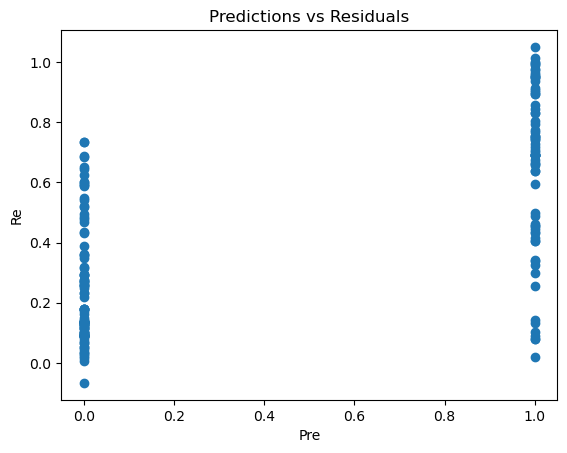

In [543]:
#plt.scatter(Y_test,Y_prediction)
#plt.xlabel('Pre')
#plt.ylabel('Re')
#plt.title('Predictions vs Residuals')

#plt.show()